<a href="https://colab.research.google.com/github/ShomritaSingha/Data-Analyst-Portfolio-Projects/blob/main/Python%20projects/Data_scrapping_%26pandas_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the tools

from bs4 import BeautifulSoup
import requests

In [ ]:
#getting the url import

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [ ]:
print(soup)  #checking the data

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=docum

In [ ]:
#soup.find_all('table')
soup.find_all()

[<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
 <meta charset="utf-8"/>
 <title>List of largest companies in the United States by revenue - Wikipedia</title>
 <script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.

In [ ]:
table= soup.find_all('table')[1]
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td>General merchandisers
</td>
<td style="text-align:center;">572,754
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 2.4%
</td>
<td style="text-al

In [ ]:
world_titles = table.find_all('th')
print(world_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [ ]:
#getting the text by looping through the titles of the world_titles and cleaning up

world_table_titles = [title.text.strip() for title in world_titles]


print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [ ]:
rows = table.find_all('td')
print(rows)

[<td>1
</td>, <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>, <td>General merchandisers
</td>, <td style="text-align:center;">572,754
</td>, <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 2.4%
</td>, <td style="text-align:center;">2,300,000
</td>, <td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">Bentonville, Arkansas</a>
</td>, <td>2
</td>, <td><a href="/wiki/Amazon_(company)" title="Amazon (company)">Amazon</a>
</td>,

In [ ]:
import pandas as pd

df = pd.DataFrame( columns = world_table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [ ]:
column_data = table.find_all('tr')

In [ ]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
3,4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
4,5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,General Dynamics,Airspace and defense,"38,469",8.7%,"103,100","Reston, Virginia"
96,97,CHS,Agriculture cooperative,"38,448",1.4%,"9,941","Inver Grove Heights, Minnesota"
97,98,USAA,Financials,"37,470",3.2%,"37,335","San Antonio, Texas"
98,99,Northwestern Mutual,Insurance,"36,751",8.8%,"7,585","Milwaukee, Wisconsin"


In [ ]:
df.index

df.set_index('Rank')

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...
96,General Dynamics,Airspace and defense,"38,469",8.7%,"103,100","Reston, Virginia"
97,CHS,Agriculture cooperative,"38,448",1.4%,"9,941","Inver Grove Heights, Minnesota"
98,USAA,Financials,"37,470",3.2%,"37,335","San Antonio, Texas"


In [ ]:
#import the data to csv

# Define the file path within the Colab environment
file_path = 'usa_top.csv'

# Export the DataFrame to the CSV file
df.to_csv(file_path, index=False)

# Download the file to your local machine
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

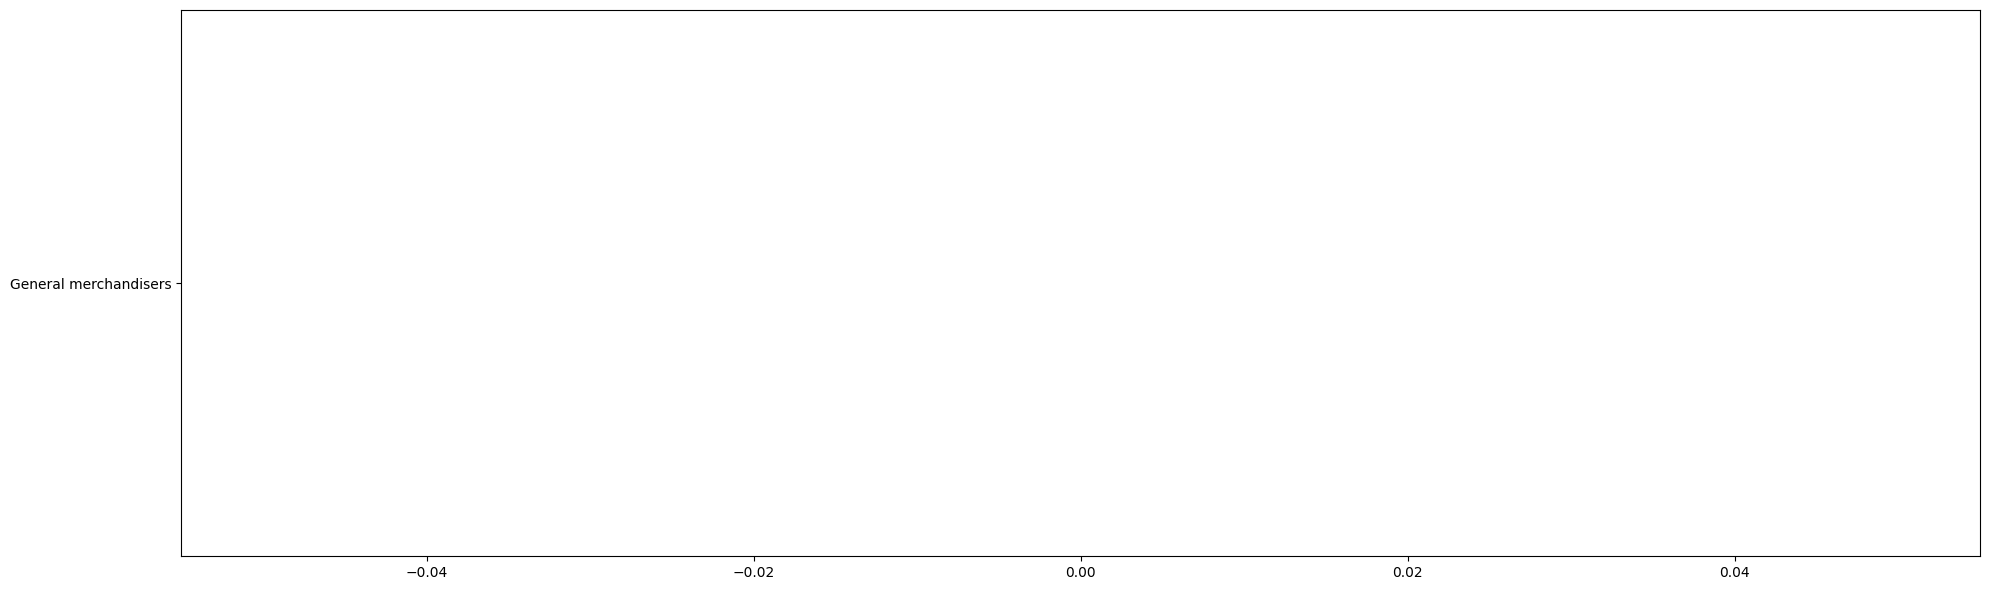

In [ ]:
#now visualising the data

#Reveneu and industry comparission

import matplotlib.pyplot as plt


# Group by 'Industry' and calculate the sum of 'Revenue (USD millions)' for each group
grouped_df = df.groupby('Industry')['Revenue (USD millions)'].sum().reset_index()

# Sort the DataFrame in descending order based on 'Revenue (USD millions)'
grouped_df = grouped_df.sort_values(by='Revenue (USD millions)', ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(df['Revenue (USD millions)'], df['Industry'])
plt.tight_layout()


In [ ]:
groups = df.groupby('Industry')

df.plot(groups['Industry'],df['Revenue (USD millions)'])

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Revenue (USD millions)' column to numeric values
df['Revenue (USD millions)'] = pd.to_numeric(df['Revenue (USD millions)'], errors='coerce')

plt.figure(figsize=(20, 6))
plt.bar(df['Industry'], df['Revenue (USD millions)'])

# Rotate x-axis labels vertically (90 degrees)
plt.xticks(rotation=90)

# Set the number of desired y-axis ticks
num_y_ticks = 5

# Calculate the range of the 'Revenue (USD millions)' column
min_revenue = df['Revenue (USD millions)'].min()
max_revenue = df['Revenue (USD millions)'].max()
step = (max_revenue - min_revenue) / (num_y_ticks - 1)

# Generate the y-axis tick values
y_ticks = [min_revenue + i * step for i in range(num_y_ticks)]

# Set the y-axis ticks
plt.yticks(y_ticks)

plt.tight_layout()
plt.show()


ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x789b30d860e0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 2000x600 with 1 Axes>

In [ ]:
df.isnull()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,True,False,False,False
96,False,False,False,True,False,False,False
97,False,False,False,True,False,False,False
98,False,False,False,True,False,False,False


In [ ]:
df.isnull().any().any()

True